In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [35]:
dataset = pd.read_csv('dbd.csv', delimiter=";", nrows=89)

In [37]:
dataset['Kelamin'].fillna(dataset['Kelamin'].mode().iloc[0], inplace=True)
dataset['Umur'].fillna(dataset['Umur'].median(), inplace=True)

In [41]:
print(dataset)

                          Nama       Alamat Kelamin  Umur
0   Anggun Kholifatul Khasanah   Karangrejo       P  11.0
1      Anggun Afifah Nurulaini  Pandanharum       P   3.0
2         Faizul Naam Hafizhan   Karangrejo       L   2.0
3                        Murni        Gabus       P  59.0
4          Salsabila Aufa Puji     Kalipang       P  11.0
..                         ...          ...     ...   ...
84               Faleshia Zoya   Bendoharjo       P   5.0
85         Hafidzah Prominensa        Gabus       P  10.0
86     Oktaviana Galih Pratiwi  Pandanharum       P  21.0
87      Khaliza Shesha Safitri   Bendoharjo       P   1.0
88                    Alfiatun  Pandanharum       P   2.0

[89 rows x 4 columns]


In [57]:
X = ['Umur', 'Kelamin']

In [58]:
print(X)

['Umur', 'Kelamin']


In [63]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
dataset['Kelamin'] = label_encoder.fit_transform(dataset['Kelamin'])

In [64]:
print(dataset)

                          Nama       Alamat  Kelamin  Umur
0   Anggun Kholifatul Khasanah   Karangrejo        1    10
1      Anggun Afifah Nurulaini  Pandanharum        1     2
2         Faizul Naam Hafizhan   Karangrejo        0     1
3                        Murni        Gabus        1    25
4          Salsabila Aufa Puji     Kalipang        1    10
..                         ...          ...      ...   ...
84               Faleshia Zoya   Bendoharjo        1     4
85         Hafidzah Prominensa        Gabus        1     9
86     Oktaviana Galih Pratiwi  Pandanharum        1    19
87      Khaliza Shesha Safitri   Bendoharjo        1     0
88                    Alfiatun  Pandanharum        1     1

[89 rows x 4 columns]


In [65]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

linkage_matrix = linkage(dataset[X], method='ward')
agglomerative = AgglomerativeClustering(n_clusters=2, linkage='ward')
dataset['cluster'] = agglomerative.fit_predict(dataset[X].values)

In [66]:
print(dataset['cluster'])

0     0
1     0
2     0
3     1
4     0
     ..
84    0
85    0
86    1
87    0
88    0
Name: cluster, Length: 89, dtype: int64


In [67]:
majority_cluster = dataset['cluster'].mode()[0]
majority_cluster_data = dataset[dataset['cluster'] == majority_cluster]

In [68]:
print(majority_cluster_data)

                          Nama       Alamat  Kelamin  Umur  cluster
0   Anggun Kholifatul Khasanah   Karangrejo        1    10        0
1      Anggun Afifah Nurulaini  Pandanharum        1     2        0
2         Faizul Naam Hafizhan   Karangrejo        0     1        0
4          Salsabila Aufa Puji     Kalipang        1    10        0
5                        Mirza        Gabus        0     7        0
..                         ...          ...      ...   ...      ...
83      Rizqia Putri Ramadhani  Tunggulrejo        1     2        0
84               Faleshia Zoya   Bendoharjo        1     4        0
85         Hafidzah Prominensa        Gabus        1     9        0
87      Khaliza Shesha Safitri   Bendoharjo        1     0        0
88                    Alfiatun  Pandanharum        1     1        0

[65 rows x 5 columns]


In [70]:
gender_counts = majority_cluster_data['Kelamin'].value_counts()
total_samples = len(majority_cluster_data)

In [71]:
for gender, count in gender_counts.items():
    percentage = (count / total_samples) * 100
    print(f"{gender}: {percentage:.2f}%")

1: 69.23%
0: 30.77%


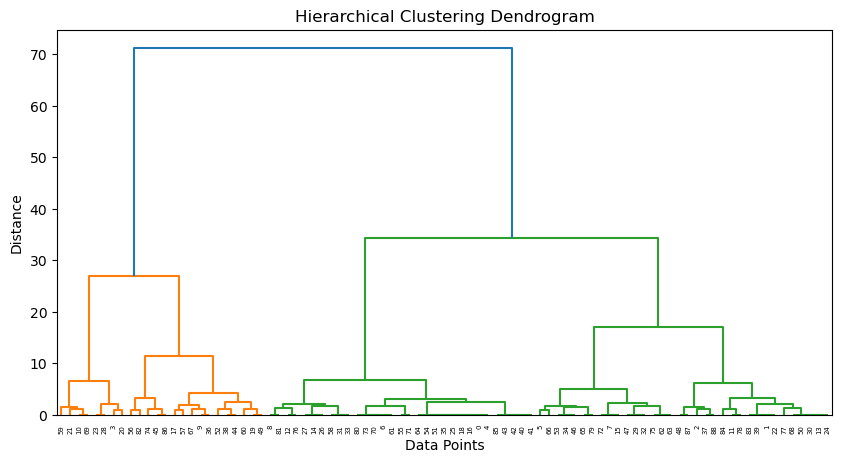

In [72]:
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [ ]:
#sementara